In [8]:
#!pip uninstall -y tensorflow tensorflow-gpu tf-models-official
#!pip install tensorflow==2.17.1 tf-models-official==2.17.0
!pip install deepface

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 100.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.

Images are locally uploaded

In [31]:
myPic1 = "/content/20220124_091439 - Copy.jpg"
myPic2 = "/content/IMG_5947 - Copy.JPG"
myPic3 = "/content/20220125_094100 - Copy.jpg"
myPic4 = "/content/20220126_142439 - Copy (2).jpg"
myPic5 = "/content/IMG_20220126_172303 - Copy.jpg"
myPic6 = "/content/DSC_0039.JPG"
myPic7 = "/content/20220125_234851 - Copy.jpg"

notmyPic = "/content/20220126_142439 - Copy.jpg"
notmyPic2 = "/content/20220126_142439 - Copy (3).jpg"
notmyPic3 = "/content/antu_bhai_pic.jpg"
myPicangled = "/content/20220124_091442 - Copy.jpg"
myMaskedPic = "/content/20220126_140858 - Copy.jpg"

In [2]:
from deepface import DeepFace
import pandas as pd
import IPython.display as display
import cv2
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

Available models: "VGG-Face",
  "Facenet",
  "Facenet512",
  "OpenFace",
  "DeepFace",
  "DeepID",
  "ArcFace",
  "Dlib",
  "SFace",
  "GhostFaceNet"

  Facenet512 seems to provide better results
  
  https://pypi.org/project/deepface/

In [32]:
def load_image(img_path, size=(100, 100)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    return img

data = []
img_display_size = (100, 100)

myPicList = [myPic1, myPic3, myPic4, myPic5, notmyPic, notmyPic2, notmyPic3, myPicangled, myPic6, myMaskedPic, myPic7]
profilePic = myPic2
for myPic in myPicList:
  try:
    result = DeepFace.verify(img1_path=profilePic,
                            img2_path=myPic,
                            model_name="Facenet512",
                            detector_backend="retinaface",
                            enforce_detection=False,  # Allow processing even if detection is weak
                            align=True) # Align face based on landmarks
    dist = result["distance"]
    res = "Same person" if result["distance"] < 0.5 else "Different people"
  except Exception as e:
    dist = -1
    res = "Face not identified properly"

  data.append([
    load_image(profilePic, img_display_size),
    load_image(myPic, img_display_size),
    round(dist, 4),
    res
  ])

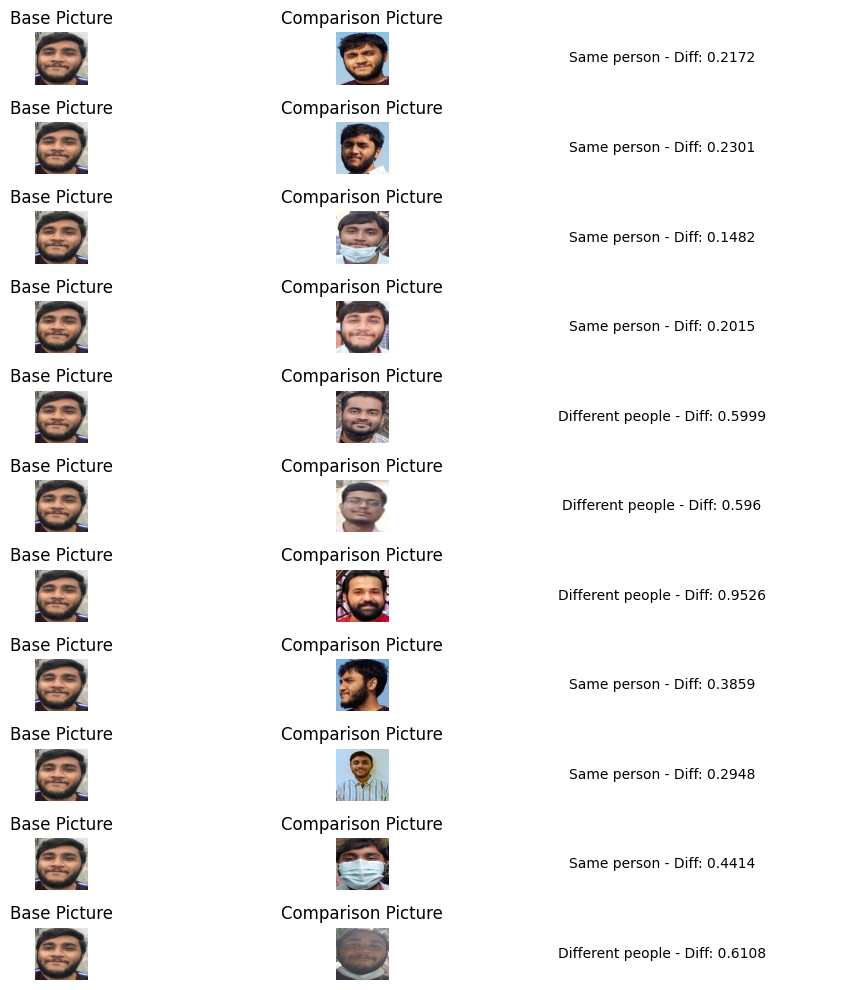

In [35]:
fig, axes = plt.subplots(len(data), 3, figsize=(10, 10))

for i, row in enumerate(data):
    axes[i, 0].imshow(row[0])
    axes[i, 0].axis('off')
    axes[i, 0].set_title("Base Picture")

    axes[i, 1].imshow(row[1])
    axes[i, 1].axis('off')
    axes[i, 1].set_title("Comparison Picture")

    axes[i, 2].axis('off')
    axes[i, 2].text(0.5, 0.5, f'{row[3]} - Diff: {row[2]}', ha='center', va='center')

plt.tight_layout()
plt.show()

Remarks: Works accurately for general cases, as well as edge cases like: side angle view, mask worn, partial face etc.

However, short-comings are seen in case of low-light exposure.